
### CAPSTONE PROJECT - Application of Piotroski F-Score on NYSE-listed Stocks
**GROUP WORK PROJECT** M3 | **GROUP NUMBER:** 2840

#### Eddie Asani, Ishrat Vasid, Yunting Chung

In this group project work, a portfolio of 5 securities are selected. Data for these securities are downloaded using their TICKERs and F-Score Analysis is applied to see how the portfolio performs with respect to the 9 indicators.

Piotroski technique, also known as F-Score, is a quantitative analysis method used to evaluate the financial health and strength of a company. It was developed by Joseph Piotroski, a professor at Stanford University, and is based on a set of nine financial and accounting criteria to identify financially healthy companies worth investing in.

The nine criteria are as follows:

1. Net Income: Whether a company has reported a positive net income.

2. Return on Assets: Whether the company's ROA has improved over the previous year.

3. Cash Flow: Whether the company generated positive cash flow from operations.

4. Long-Term Debt: Whether the company has reduced long-term debt in comparison to the previous year.

5. Current Ratio: Whether the company's current assets are sufficient to cover current liabilities.

6. Gross Margin: Whether the company has improved its gross margin in comparison to the previous year.

7. Asset Turnover: Whether the company has improved its asset turnover ratio in comparison to the previous year.

8. Issuance of New Shares: Whether the company has issued new shares or not.

9. Operating Efficiency: Whether the company has improved its operating efficiency in comparison to the previous year.

In [4]:
# Import Libraries
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns
# pdr does not have yahoo. Override by importing yfinance and overriding pdr web
import yfinance as yfin
yfin.pdr_override()

In [8]:
# Importing the data from yahoo
# We choose a time period of 12 months covering the first two quarters of 2022
assets_list = ["AAPL", "META", "OXY", "SHOP", "TSLA"]
start = '2022-04-01'
end = '2023-04-01'
prices = web.get_data_yahoo(assets_list , start , end)["Adj Close"]

[*********************100%***********************]  5 of 5 completed


In [9]:
#Display limited number of records 
prices.head()

,AAPL,META,OXY,SHOP,TSLA
Date,,,,,
2022-03-31,173.558640,222.360001,56.240505,67.596001,359.200012
2022-04-01,173.260437,224.850006,57.598450,69.300003,361.529999
2022-04-04,177.365570,233.889999,57.281269,72.728996,381.816681
2022-04-05,174.005920,231.839996,55.229488,70.292000,363.753326
2022-04-06,170.795380,223.300003,55.606140,65.657997,348.586670


In [10]:
#Log Returns Calculation
returns = np.log(prices / prices.shift(1))
# returns = prices.pct_change()
#Drop the first row that has NaN
returns = returns.dropna()
returns.head()

,AAPL,META,OXY,SHOP,TSLA
Date,,,,,
2022-04-01,-0.001720,0.011136,0.023858,0.024896,0.006466
2022-04-04,0.023417,0.039417,-0.005522,0.048295,0.054596
2022-04-05,-0.019124,-0.008803,-0.036477,-0.034082,-0.048465
2022-04-06,-0.018623,-0.037531,0.006797,-0.068199,-0.042589
2022-04-07,0.001802,-0.001569,0.027775,-0.019392,0.010937


###  Correlation and Covariance Matrices**

In [11]:
# Compute the correlation and covariance matrices
correlation_matrix = returns.corr()
covariance_matrix = returns.cov()
# Display the covariance matrix
covariance_matrix

,AAPL,META,OXY,SHOP,TSLA
AAPL,0.000478,0.000519,0.000225,0.000646,0.000572
META,0.000519,0.001564,0.000228,0.001018,0.000626
OXY,0.000225,0.000228,0.000859,0.000276,0.000305
SHOP,0.000646,0.001018,0.000276,0.002819,0.001319
TSLA,0.000572,0.000626,0.000305,0.001319,0.001792


In [12]:
#display the correlation matrix
correlation_matrix

,AAPL,META,OXY,SHOP,TSLA
AAPL,1.000000,0.600600,0.351416,0.556899,0.617674
META,0.600600,1.000000,0.196686,0.484604,0.374117
OXY,0.351416,0.196686,1.000000,0.177160,0.246038
SHOP,0.556899,0.484604,0.177160,1.000000,0.586589
TSLA,0.617674,0.374117,0.246038,0.586589,1.000000


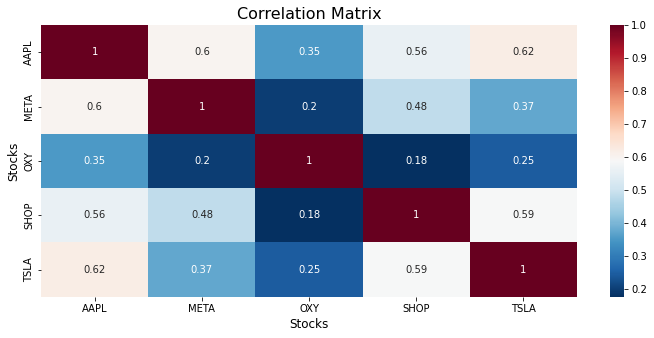

In [13]:
#Plotting the correlation matrix
plt.figure(figsize=(12,5))
sns.heatmap(correlation_matrix, annot = True,  cmap="RdBu_r")
plt.title('Correlation Matrix',fontsize=16)
plt.xlabel('Stocks',fontsize=12)
plt.ylabel('Stocks',fontsize=12)
plt.show()

For our first market analysis structure we utilize financialmodelingprep website to gather balance sheet data for TSLA. We are currently working to refine our capstone scope to get the best out of the technique. Hopefully in M4 we would have structured our stocks to a confined data set.

In [14]:

for ticker in assets_list:
    url = f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{ticker}?apikey=49aa73abf2e633cb2ea13b567c3116fd'
    response = requests.get(url)
    balance_sheet = pd.DataFrame(response.json())

balance_sheet

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,cashAndCashEquivalents,shortTermInvestments,...,totalStockholdersEquity,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,link,finalLink
0,2022-12-31,TSLA,USD,0001318605,2023-01-31,2023-01-30 21:29:15,2022,FY,16253000000,5932000000,...,44704000000,44704000000,82338000000,0,82338000000,5932000000,5748000000,-10505000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
1,2021-12-31,TSLA,USD,0001318605,2022-02-07,2022-02-04 20:11:27,2021,FY,17576000000,131000000,...,30189000000,30189000000,62131000000,0,62131000000,131000000,8873000000,-8703000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2,2020-12-31,TSLA,USD,0001318605,2021-02-08,2021-02-08 07:27:23,2020,FY,19384000000,0,...,22225000000,22225000000,52148000000,0,52148000000,0,13279000000,-6105000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
3,2019-12-31,TSLA,USD,0001318605,2020-02-13,2020-02-13 07:12:18,2019,FY,6268000000,0,...,6618000000,6618000000,34309000000,0,34309000000,0,14697000000,8429000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
4,2018-12-31,TSLA,USD,0001318605,2019-02-19,2019-02-19 06:10:16,2018,FY,3685618000,0,...,4923243000,4923243000,29739614000,0,29739614000,0,13827271000,10141653000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
5,2017-12-31,TSLA,USD,0001318605,2018-02-23,2018-02-23 06:07:43,2017,FY,3367914000,0,...,4237242000,4237242000,28655372000,0,28655372000,0,12115948000,8748034000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
6,2016-12-31,TSLA,USD,0001318605,2017-03-01,2017-03-01 16:54:21,2016,FY,3393216000,0,...,4752911000,4752911000,22664076000,0,22664076000,0,8588115000,5194899000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
7,2015-12-31,TSLA,USD,0001318605,2016-02-24,2016-02-24 16:17:56,2015,FY,1196908000,0,...,1088944000,1088944000,8092460000,0,8092460000,0,2715586000,1518678000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
8,2014-12-31,TSLA,USD,0001318605,2015-02-26,2015-02-26 17:13:26,2014,FY,1905713000,0,...,911710000,911710000,5849251000,0,5849251000,0,2509109000,603396000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
9,2013-12-31,TSLA,USD,0001318605,2014-02-26,2014-02-26 16:02:51,2013,FY,845889000,0,...,667120000,667120000,2416930000,0,2416930000,0,606878000,-239011000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...


#### Note: We are still working on finding the ways to get financial indicators data for NYSE S&P 500. This is just a sample code to start the collabration and share our progress.